<a href="https://colab.research.google.com/github/Codassah/Azubi_assessment-Esther/blob/main/decision_trees_%26random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Performance:
Accuracy: 0.8831
Precision: 0.4837
Recall: 0.5603
F1 Score: 0.5192
ROC AUC: 0.7422

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7310
           1       0.48      0.56      0.52       928

    accuracy                           0.88      8238
   macro avg       0.71      0.74      0.73      8238
weighted avg       0.89      0.88      0.89      8238


Random Forest Performance:
Accuracy: 0.9153
Precision: 0.6164
Recall: 0.6562
F1 Score: 0.6357
ROC AUC: 0.9489

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      7310
           1       0.62      0.66      0.64       928

    accuracy                           0.92      8238
   macro avg       0.79      0.80      0.79      8238
weighted avg       0.92      0.92      0.92      8238



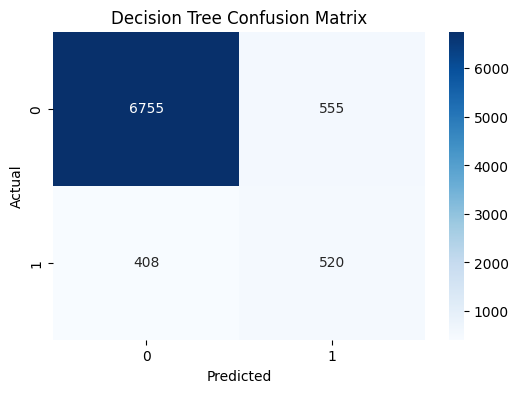

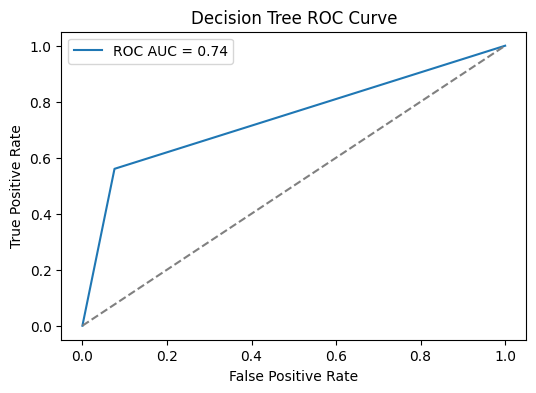

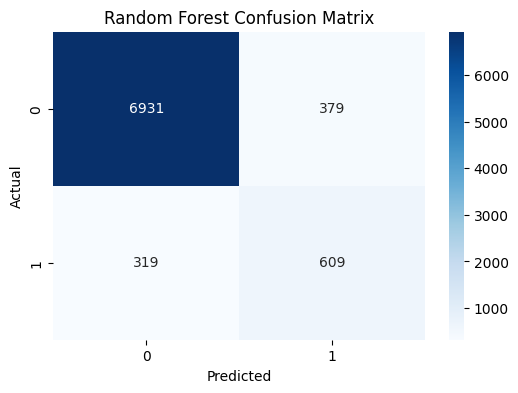

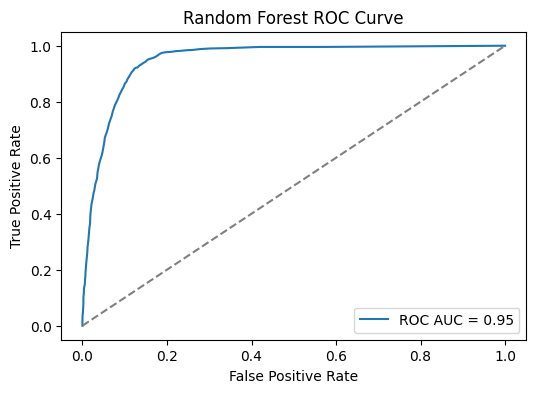


Top 10 Features for Random Forest:
duration: 0.3381
euribor3m: 0.0821
nr.employed: 0.0677
emp.var.rate: 0.0495
campaign: 0.0469
cons.conf.idx: 0.0378
age: 0.0368
housing_yes: 0.0325
cons.price.idx: 0.0255
contact_telephone: 0.0249

Top 10 Features for Decision Tree:
duration: 0.4515
nr.employed: 0.1561
cons.conf.idx: 0.0720
euribor3m: 0.0477
campaign: 0.0378
age: 0.0340
cons.price.idx: 0.0172
housing_yes: 0.0166
emp.var.rate: 0.0130
default_unknown: 0.0112


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Encode the target variable 'y' (yes/no to 1/0)
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = data.drop('y', axis=1)
y = data['y']

# One-hot encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate Decision Tree
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Visualizations for Decision Tree
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f"ROC AUC = {roc_auc_score(y_test, y_proba_dt):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.show()

# Visualizations for Random Forest
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"ROC AUC = {roc_auc_score(y_test, y_proba_rf):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()

# Feature Importance for Random Forest (Top 10 features)
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
print("\nTop 10 Features for Random Forest:")
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Feature Importance for Decision Tree (Top 10 features)
importances_dt = dt_model.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]
print("\nTop 10 Features for Decision Tree:")
for i in range(10):
    print(f"{feature_names[indices_dt[i]]}: {importances_dt[indices_dt[i]]:.4f}")